In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tomlkit

from pathlib import Path

# plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
spy = 365.0 * 86400.0

In [3]:
refpath = Path("benchmark")
ref_species = [
    "E", "GRAIN-", "H-", "D-", "C-", "O-", "CN-", "OH-", "OD-", "H2_PARA", "H2_ORTHO", "HD", "D2_PARA", "D2_ORTHO", "H", "D", "GRAIN0", "HE", "CO", "C", "N", "O", "N2", "NH", "ND", "NO", "O2", "OH", "OD", "C2H", "C2", "C2D", "C2N", "CN", "C3", "CCO", "CH2", "CD2", "CHD", "CO2", "H2O", "D2O", "HDO", "HCN", "DCN", "HCO", "DCO", "HNC", "DNC", "HNO", "DNO", "N2O", "NH2", "ND2", "NHD", "NO2", "O2H", "O2D", "OCN", "CH", "CD", "H3+_PARA", "H3+_ORTHO", "H2D+_PARA", "H2D+_ORTHO", "D2H+_PARA", "D2H+_ORTHO", "D3+_ORTHO", "D3+_META", "H+", "HD+", "D2+_ORTHO", "D2+_PARA", "HE+", "HCO+", "DCO+", "C+", "D+", "N+", "O+", "H2+_PARA", "H2+_ORTHO", "CH+", "CD+", "NO+", "O2+", "CH2+", "CD2+", "CHD+", "HNO+", "DNO+", "NH2+", "ND2+", "NHD+", "CO+", "C2+", "OH+", "OD+", "C2H+", "C2D+", "NH+", "ND+", "H2O+", "D2O+", "HDO+", "CN+", "C3+", "C2O+", "HOC+", "DOC+", "C2N+", "CNC+", "HCN+", "DCN+", "HNC+", "DNC+", "NCO+", "N2H+", "N2D+", "O2H+", "O2D+", "HEH+", "HED+", "N2+", "CO2+", "NO2+", "D3+_PARA", "H3O+", "H2DO+", "HD2O+", "D3O+"
]
ref_nspec = len(ref_species)
ref_alldata = np.loadtxt(refpath / "evolution_singlegrid.txt")
ref_time = ref_alldata[:, 0]

def name_convert(name: str) -> str:
    newname = name
    if name.startswith("o"):
        newname = f"{name[1:]}_ORTHO"
    elif name.startswith("p"):
        newname = f"{name[1:]}_PARA"

    return newname

In [4]:
with open("naunet_config.toml") as config:
    content = tomlkit.loads(config.read())

summary = content["summary"]
cur_species = summary["list_of_species"]
cur_nspec = summary["num_of_species"]

cur_alldata = np.fromfile(f"build/tests/evolution_singlegrid.bin", dtype="float64").reshape(-1, cur_nspec+1)
cur_time = cur_alldata[:, 0]


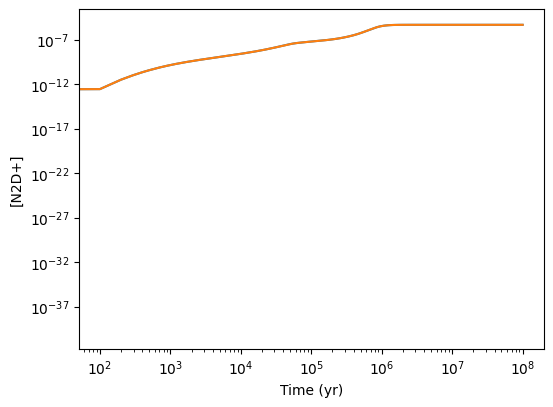

In [5]:
spec = "N2D+"
cur_sidx = cur_species.index(spec) + 1
ref_sidx = ref_species.index(name_convert(spec)) + 1

fig, ax = plt.subplots(facecolor="w")

ax.plot(cur_time, cur_alldata[:, cur_sidx]);
ax.plot(ref_time, ref_alldata[:, ref_sidx]);

ax.set_xscale('log');
ax.set_yscale('log');
ax.set_xlabel('Time (yr)');
ax.set_ylabel(f'[{spec}]');

Time consumption ratio:  4.352027154439927


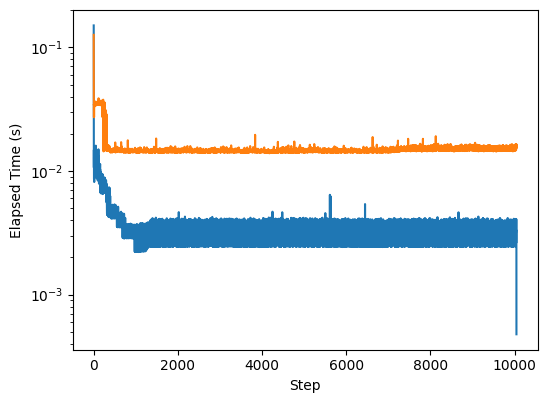

In [6]:
ref_perftime = np.loadtxt(refpath / "time_singlegrid.txt")
cur_perftime = np.loadtxt("build/tests/time_singlegrid.txt")

fig, ax = plt.subplots(facecolor="w")

ax.plot(np.arange(0, len(cur_perftime)), cur_perftime);
ax.plot(np.arange(0, len(ref_perftime)), ref_perftime);

ax.set_yscale("log");
ax.set_xlabel("Step");
ax.set_ylabel("Elapsed Time (s)");

print("Time consumption ratio: ", np.sum(ref_perftime) / np.sum(cur_perftime))
